# Part I - (Données PISA)
## by (James Bimbai)

## Introduction
> PISA est une enquête sur les compétences et les connaissances des élèves sur les mathématiques et la culture scientifique. Cette enquête se fait dans 65 pays et examine dans quelle mesure les élèves ont appris le programme scolaire et dans quelle mesure ils sont préparés à la vie après l'école.


## Résumé de nettoyage


Pour une meilleur analyse je vais devoir réorganiser mon dataframe pour filtrer les informations sur le comportement des 
élèves envers les mathématiques et aussi le comprtement des parents envers les mathématiques.Pour cela je regroupe les 
informations necessaire en plusieurs blocs:

* self
* gender
* objective:La motivation d'étudier les mathématiques
* apprehension:l'importance d'étudier les mathématiques
* score:Le score des mathématiques
* parents_view: La vision des parents sur des mathématiques
* importance: l'intérêt d'étudier les mathématiques
* work_method: Méthode d'apprentissage

## EXPLORATION ##

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.style.use('fivethirtyeight')

In [17]:
pisa=pd.read_csv('pisa2012_.csv')
pisa.head()

country  gender  objective  importance  work_method  attitude  \
0  Albania  Female   406.8469        3.50          2.6      3.00   
1  Albania  Female   486.1427        2.75          NaN      2.25   
2  Albania  Female   533.2684        4.00          NaN      3.25   
3  Albania  Female   412.2215         NaN          NaN       NaN   
4  Albania  Female   381.9209        4.00          3.2      2.50   

   parents_view      self  score  apprehension  
0      3.000000  3.000000   1.75           2.8  
1      3.222222  2.666667   2.50           NaN  
2      3.888889  3.666667   2.00           NaN  
3           NaN       NaN    NaN           2.6  
4      3.777778  3.666667    NaN           2.4

In [104]:
# information sur le dataframe
print(pisa.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 0 to 485489
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country       485490 non-null  object 
 1   gender        485490 non-null  object 
 2   objective     485490 non-null  float64
 3   importance    312694 non-null  float64
 4   work_method   307425 non-null  float64
 5   attitude      311611 non-null  float64
 6   parents_view  306731 non-null  float64
 7   self          311682 non-null  float64
 8   score         307112 non-null  float64
 9   apprehension  306931 non-null  float64
dtypes: float64(8), object(2)
memory usage: 40.7+ MB
None


In [58]:
# modifions le type de donnée
pisa[['country','gender']]=pisa[['country','gender']].astype('category')

In [59]:
print(pisa.describe())

           objective     importance    work_method       attitude  \
count  485490.000000  312694.000000  307425.000000  311611.000000   
mean      469.621653       2.988886       2.495314       2.445061   
std       103.265391       0.740661       0.683011       0.779287   
min        19.792800       1.000000       1.000000       1.000000   
25%       395.318600       2.500000       2.000000       2.000000   
50%       466.201900       3.000000       2.400000       2.500000   
75%       541.057800       3.500000       3.000000       3.000000   
max       962.229300       4.000000       4.000000       4.000000   

        parents_view           self          score   apprehension  
count  306731.000000  311682.000000  307112.000000  306931.000000  
mean        2.866265       3.066485       1.677428       2.482890  
std         0.577228       0.610225       0.557671       0.742968  
min         1.000000       1.000000       1.000000       1.000000  
25%         2.555556       2.666667   

**Quelle est la structure de mon dataframe?**

N ous avons 485 490 étudiants dans l'ensemble de données avec des caractéristiques (pays, sexe, score, importance, apprehension, , objective, attitude,work_method, soi et parents). Le pays et le sexe sont de type catégorie et les autres caractéristiques sont numériques.

**Quelle(s) est/sont la/les principale(s) caractéristique(s) d'intérêt dans votre jeu de données ?**


L'influence du sexe sur les compétences en mathématiques des elèves, le point de vue des des elèves et aussi celui des parents sur les mathématiques.

**Selon vous, quelles fonctionnalités de l'ensemble de données vous aideront à étayer votre enquête sur les fonctionnalités qui vous intéressent ??**


Pour les tests, nous travaillerons avec le score et pour la motivation à faire des mathématiques, nous travaillerons avec , objective, importance, apprehension, work_method. 

### Exploration Univariée

**OBJECTIVE**

**Question 1:**

* L'objectif semble ne pas être équitable dans les pays.

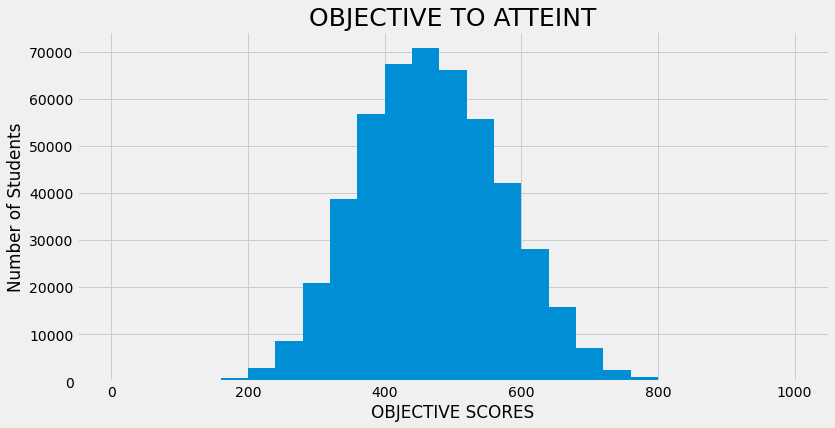

In [24]:
# Définir la taille de la figure
plt.figure(figsize=[12,6])


bins = np.arange(0, pisa['objective'].max()+40, 40)

plt.hist(data=pisa, x='objective', bins=bins);
plt.title('OBJECTIVE TO ATTEINT', size=25)
plt.xlabel('OBJECTIVE SCORES')
plt.ylabel('Number of Students');

plt.savefig('hist_score.png')


**Le score est presque distribué avec un pic de 700.**

**GENDER**

**Question 2 :**

* Nous constactons une prédominance des étudiantes .

In [ ]:
gender_counts = pisa['gender'].value_counts()

plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False);

# Nous avons utilisé l'option « Square ».
plt.axis('square')

plt.title('STUDENTS BY GENDER');

In [37]:
percent_male = pisa['gender'].value_counts()['Male']/pisa.shape[0]
percent_female = pisa['gender'].value_counts()['Female']/pisa.shape[0]
print('Male: {:.2f}%'.format(percent_male))
print('Female: {:.2f}%'.format(percent_male))

Male: 0.50%
Female: 0.50%


**Les sexes sont égaux**

**COUNTRY**

**Qusetion 3 :**

* Quel est la representation du nombres d'élèves par pays?.

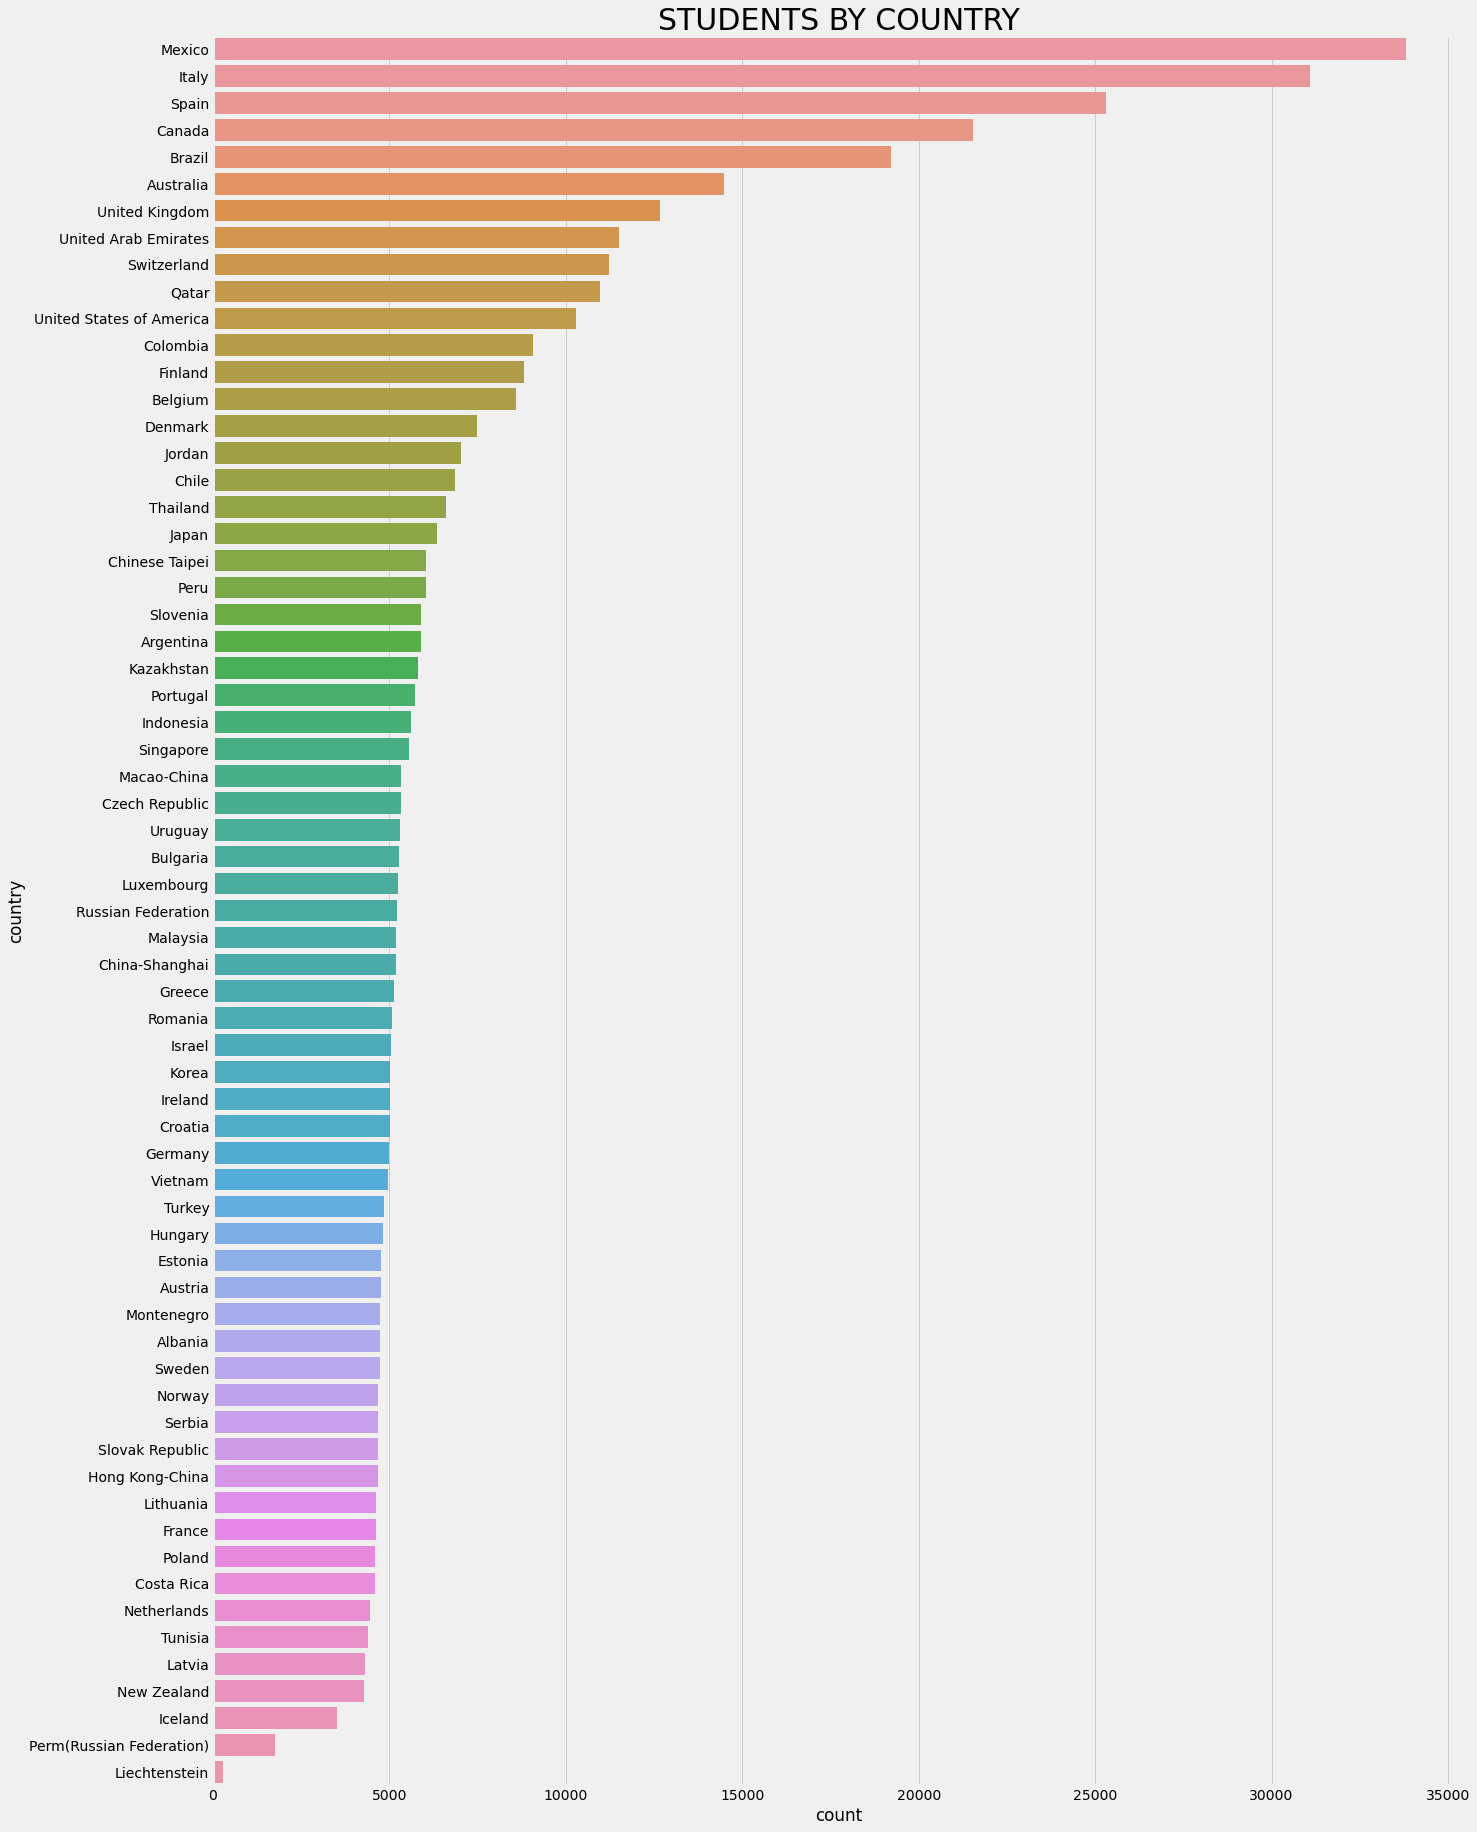

In [38]:

# Définir une taille de figure
plt.figure(figsize=[20,30])

# Tracer le pays sur un diagramme à barres horizontal
type_order= pisa['country'].value_counts().index
sb.countplot(data=pisa,y='country', order=type_order)
plt.title('STUDENTS BY COUNTRY',size=30);


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


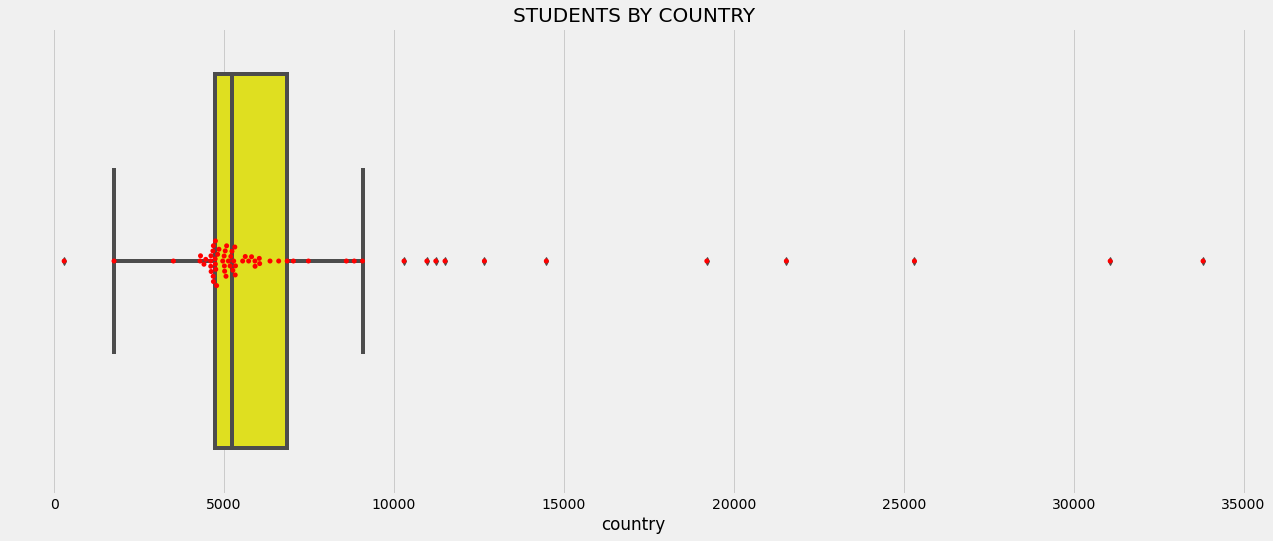

In [42]:
# Définir une taille de figure
plt.figure(figsize=(20,8))

# Affichage du diagramme
order = pisa['country'].value_counts()

sb.boxplot(order, color='yellow')
sb.swarmplot(order, color='red')
plt.title('STUDENTS BY COUNTRY', size=20);


**La marge entre d'élèves qui participent à l'enquête est entre 5 000 et 7 000. La boîte à moustaches montre également qu'il existe quelques valeurs aberrantes.**

In [43]:
order.describe()

count       65.000000
mean      7469.076923
std       6125.192028
min        293.000000
25%       4743.000000
50%       5231.000000
75%       6856.000000
max      33806.000000
Name: country, dtype: float64

**ATTITUDE**

**Question 3 :**

* Quelle influence l'attitude a telle sur les étudiants?.

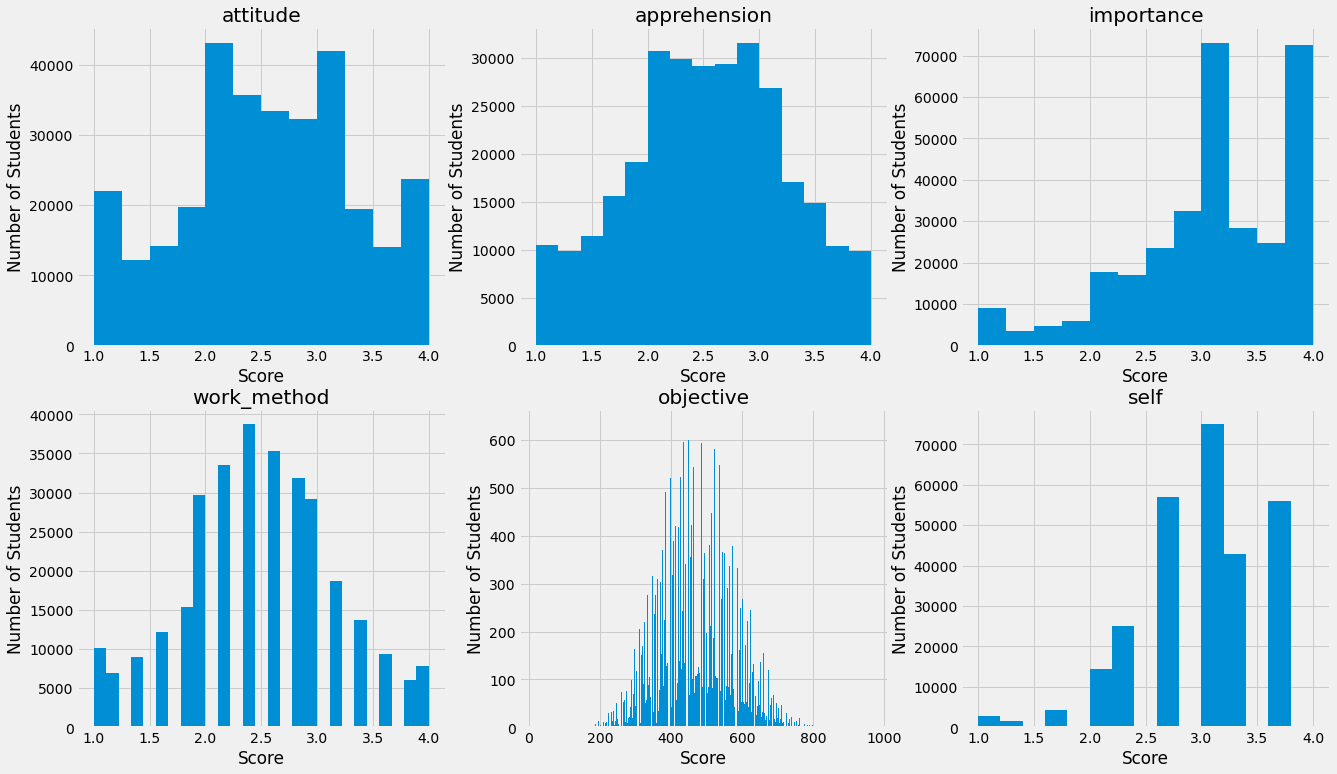

In [23]:
# Affichage du diagramme
binsize=[1/4,1/5,1/4,1/9,1/8,1/5]


behavior=['attitude', 'apprehension','importance', 'work_method', 'objective', 'self']

fig, ax= plt.subplots(nrows=2,ncols=3,figsize=[20,12])

ax=ax.flatten()
i=0

for title in behavior:
    bins=np.arange(min(pisa[title]), max(pisa[title]) +binsize[i], binsize[i])
    ax[i].hist(data=pisa, x=title, bins=bins)
    ax[i].set_xlabel('Score')
    ax[i].set_ylabel('Number of Students')
    ax[i].set_title(title)
    i+=1

plt.savefig('hist_attitude.png')

**L'objective semble légèrement asymétrique.**

**l'apprehension est presque normalement distribuée**

**work_method est presque asymétrique.**

**PARENTS_VIEW**

**Question 4 :**

* Observons le point de vue des parents sur l'apport des mathématiques

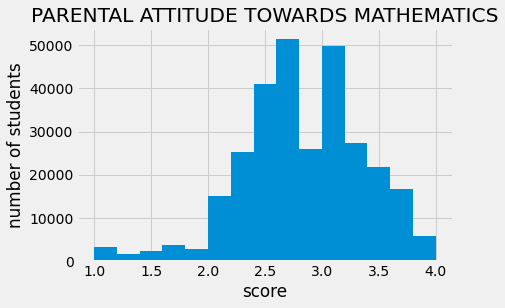

In [49]:
# Affichage du diagramme
bins=np.arange(pisa['parents_view'].min(),pisa['parents_view'].max() +1/5, 1/5)

plt.hist(data=pisa, x='parents_view', bins=bins)
plt.xlabel('score')
plt.ylabel('number of students')
plt.title('PARENTAL ATTITUDE TOWARDS MATHEMATICS');



**Nous avons une faible inclinaison vers la gauche, nous avons la preuve que la plupart des élèves ont une opinion positive de l'attitude de leurs parents envers les mathématiques**

### Examinions le centile supérieur des étudiants et voyions comment le sexe est réparti.

In [61]:
pisa_60=pisa.query('score>=@pisa.score.quantile(.60)')
pisa_75=pisa.query('score>=@pisa.score.quantile(.75)')
pisa_80=pisa.query('score>=@pisa.score.quantile(.80)')
pisa_90=pisa.query('score>=@pisa.score.quantile(.90)')


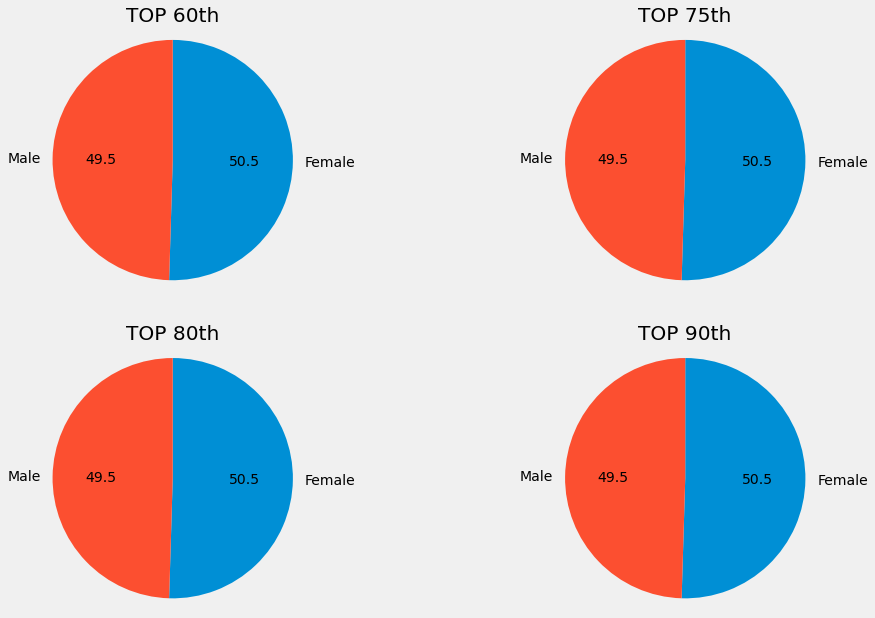

In [112]:
def encodings_solution_2(range):
# configuration des données
    percent=[60,75,80,90]
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(15,10))
#orders = pisa['gender'].value_counts()
ax=ax.flatten()
# traçage
for i in range(4):
    plt.sca(ax[i])
    df=eval('pisa_'+str(percent[i]))
    plt.pie(orders, labels=orders.index,startangle=90,counterclock=False,autopct='%.1f')
    plt.axis('square')
    plt.title('TOP '+ str(percent[i])+'th')

**De fure et à mesure que le nième centile supérieur augmente l'écart entre les sexes est identique.**

### EXPLORATION BIVARIEE

**Gender by Each Country**

**Question 5 :**

* Comparons le pourcentage d'élèves par sexe dans chaque pays

In [ ]:
# Définir une taille de figure
plt.figure(figsize=[20,30])

# Tracer le pays sur un diagramme à barres horizontal
type_orders= pisa['country'].value_counts().index

sb.countplot(data=pisa,y='country', order=type_orders, hue='gender')
plt.title('STUDENTS BY COUNTRY',size=30);

**Presque tous les pays ont une repartition de sexe presque égale à l'exception du Mexique, la Thaïlande, la tunisie et Israël**

In [65]:
country=pisa['country'].unique().tolist()
country.sort()

In [66]:
pisa_female=pisa.query('gender=="Female"').groupby('country').size()
pisa_male=pisa.query('gender=="Male"').groupby('country').size()

In [67]:
# assurons de la correspondance des indexes
country==pisa_female.index.tolist()==pisa_male.index.tolist()

True

In [68]:
pisa_gender=pd.DataFrame({'country': country, 'pisa_female': pisa_female.values,'pisa_male':pisa_male.values})

In [69]:
pisa_gender['total_pop']=pisa_gender['pisa_female']+pisa_gender['pisa_male']

In [70]:
pisa_gender['pisa_female_percent']=100*(pisa_gender['pisa_female']/pisa_gender['total_pop'])
pisa_gender['pisa_male_percent']=100*(pisa_gender['pisa_male']/pisa_gender['total_pop'])
pisa_gender['diff_percent']=(np.absolute((pisa_gender['pisa_female_percent']-pisa_gender['pisa_male_percent'])))

In [71]:
pisa_gender.head(10)

country  pisa_female  pisa_male  total_pop  pisa_female_percent  \
0         Albania         2416       2327       4743            50.938225   
1       Argentina         3113       2795       5908            52.691266   
2       Australia         7075       7406      14481            48.857123   
3         Austria         2357       2398       4755            49.568875   
4         Belgium         4287       4310       8597            49.866232   
5          Brazil        10175       9029      19204            52.983753   
6        Bulgaria         2578       2704       5282            48.807270   
7          Canada        10943      10601      21544            50.793724   
8           Chile         3512       3344       6856            51.225204   
9  China-Shanghai         2637       2540       5177            50.936836   

   pisa_male_percent  diff_percent  
0          49.061775      1.876450  
1          47.308734      5.382532  
2          51.142877      2.285754  
3          50.431125      0.862250  
4          50.133768      0.267535  
5          47.016247      5.967507  
6          51.192730      2.385460  
7          49.206276      1.587449  
8          48.774796      2.450408  
9          49.063164      1.873672

In [72]:
pisa_gender['diff_percent'].describe()

count    65.000000
mean      2.978123
std       2.855713
min       0.042159
25%       0.862250
50%       1.889100
75%       4.617358
max      13.109295
Name: diff_percent, dtype: float64

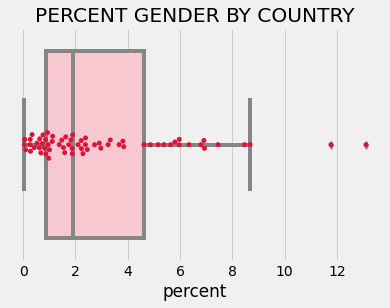

In [73]:
# Affichage du diagramme

sb.swarmplot(data=pisa_gender,x='diff_percent',color='crimson')
sb.boxplot(data=pisa_gender, x='diff_percent',color='pink')
plt.title('PERCENT GENDER BY COUNTRY')
plt.xlabel('percent');

**Près de la moitié des pays ont une différence de sexe d'environ 2 % .**

In [74]:
pisa_gender.sort_values('diff_percent',ascending=False).head(10)

country  pisa_female  pisa_male  total_pop  pisa_female_percent  \
57         Thailand         3736       2870       6606            56.554647   
26           Israel         2825       2230       5055            55.885262   
53         Slovenia         2699       3212       5911            45.660633   
58          Tunisia         2390       2017       4407            54.231904   
21  Hong Kong-China         2161       2509       4670            46.274090   
31            Korea         2342       2691       5033            46.532883   
12       Costa Rica         2460       2142       4602            53.455020   
64          Vietnam         2648       2311       4959            53.397862   
63          Uruguay         2826       2489       5315            53.170273   
5            Brazil        10175       9029      19204            52.983753   

    pisa_male_percent  diff_percent  
57          43.445353     13.109295  
26          44.114738     11.770524  
53          54.339367      8.678735  
58          45.768096      8.463808  
21          53.725910      7.451820  
31          53.467117      6.934234  
12          46.544980      6.910039  
64          46.602138      6.795725  
63          46.829727      6.340546  
5           47.016247      5.967507

**En examinant les 10 premiers pays, nous constatons que 7 pays sur 10 sont dominés par les femmes.**

**GENDER BY STUDENT'S PERCEPTION OF PARENTAL ATTITUDE TOWARDS MATHEMATICS**

**Question 6 :**

* le sexe influence t-il l'attitude des parents?

Text(0.5, 1.0, 'PARENTAL VIEW BY GENDER')

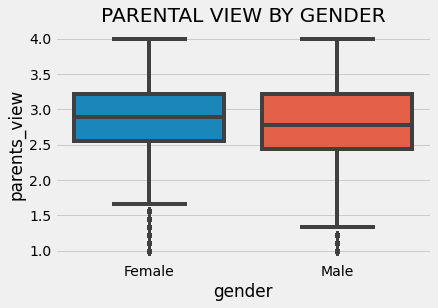

In [27]:
# Affichage du diagramme

sb.boxplot(data=pisa, y='parents_view', x='gender');
plt.title('PARENTAL VIEW BY GENDER')

In [78]:
pisa.query('gender=="Female"').parents_view.describe(), pisa.query('gender=="Male"').parents_view.describe()

(count    156145.000000
 mean          2.900185
 std           0.555986
 min           1.000000
 25%           2.555556
 50%           2.888889
 75%           3.222222
 max           4.000000
 Name: parents_view, dtype: float64,
 count    150586.000000
 mean          2.831092
 std           0.596426
 min           1.000000
 25%           2.444444
 50%           2.777778
 75%           3.222222
 max           4.000000
 Name: parents_view, dtype: float64)

**Il ya pas une grande difference entre les étudiants masculins et les étudiants féminins sur la perception des parents sur les mathématiques dans les pourcentages suivants: 25%, 50%, 75%.**

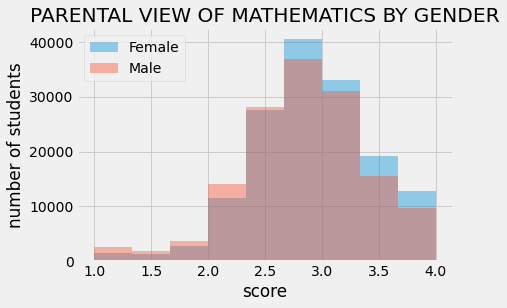

In [79]:
# Affichage du diagramme
plt.hist(pisa.query('gender=="Female"')['parents_view'],bins=np.arange(1,4+1/3,1/3), label='Female', alpha=.4)
plt.hist(pisa.query('gender=="Male"')['parents_view'],bins=np.arange(1,4+1/3,1/3), label='Male', alpha=.4)
plt.legend()
plt.title('PARENTAL VIEW OF MATHEMATICS BY GENDER')
plt.xlabel('score')
plt.ylabel('number of students');

**Nous avons moins de filles et garçons qui ont répondu à toutes les questions sous Parental.**

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


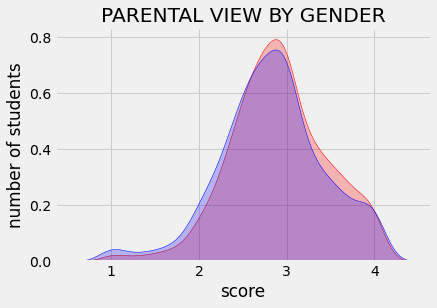

In [80]:
sb.kdeplot(data=pisa.query('gender=="Female"')['parents_view'], shade=True, color='red', bw=1/4, label='Female')
sb.kdeplot(data=pisa.query('gender=="Male"')['parents_view'], shade=True, color='blue', bw=1/4, label='Male')
plt.title('PARENTAL VIEW BY GENDER')
plt.xlabel('score')
plt.ylabel('number of students');

**Nous constatons que peu d'élèves de sexe masculin pensent que les mathématiques sont bien.**

**GENDER BY BEHAVIOR**

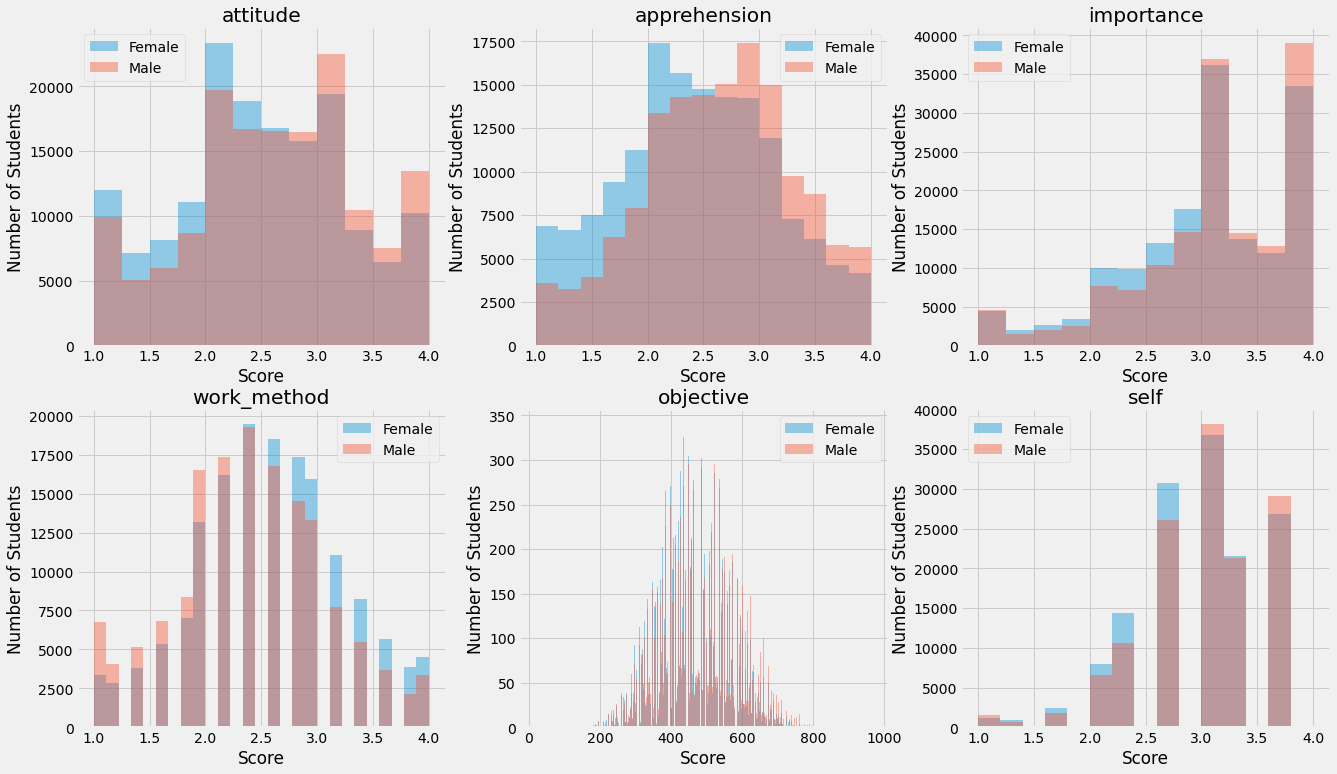

In [22]:

behavior=['attitude', 'apprehension','importance', 'work_method', 'objective', 'self']

fig, ax= plt.subplots(nrows=2,ncols=3,figsize=[20,12])

#binsizes were determined by number of questions per section.
#binsizes = 1/(number of questions per section)
binsizes=[1/4,1/5,1/4,1/9,1/8,1/5]

ax=ax.flatten()
i=0

for title in behavior:
    bins=np.arange(min(pisa[title]), max(pisa[title]) +binsizes[i], binsizes[i])
    ax[i].hist(data=pisa.query('gender=="Female"'), x=title, bins=bins,label='Female', alpha=.4)
    ax[i].hist(data=pisa.query('gender=="Male"'),x=title, bins=bins,label='Male', alpha=.4)
    
    ax[i].set_xlabel('Score')
    ax[i].set_ylabel('Number of Students')
    ax[i].set_title(title)
    ax[i].legend()
    i+=1
    plt.savefig('hist_behavior.png')

**Nous constactons que les graphes montrent un scrore élevé des étudiants de sexe masculin**

**ATTITUDE BY PARENTAL VIEW**

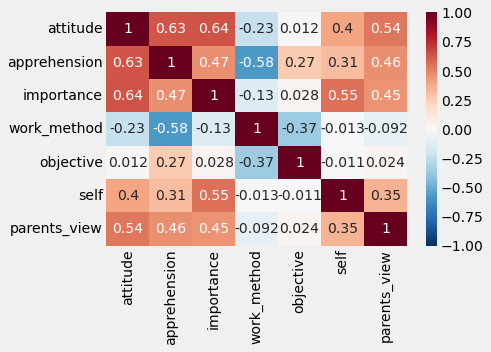

In [10]:
# Affichage du diagramme

sb.heatmap(data=pisa[behavior+['parents_view']].corr(), center=0, cmap="RdBu_r",annot=True, vmin=-1, vmax=1);


**La correction est positive et modérée de la façon dont les élèves perçoivent l'attitude des parents envers les mathématiques et la motivation de l'élève pour les mathématiques.**

### EXPLORATION MULTIVARIEE ###

**OBJECTIVE SCORE BY GENDER BY COUNTRY**

**Question 8 :**

* Existe t-il une proportionnalité selon des objectifs et le pays en fonction du sexe?.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

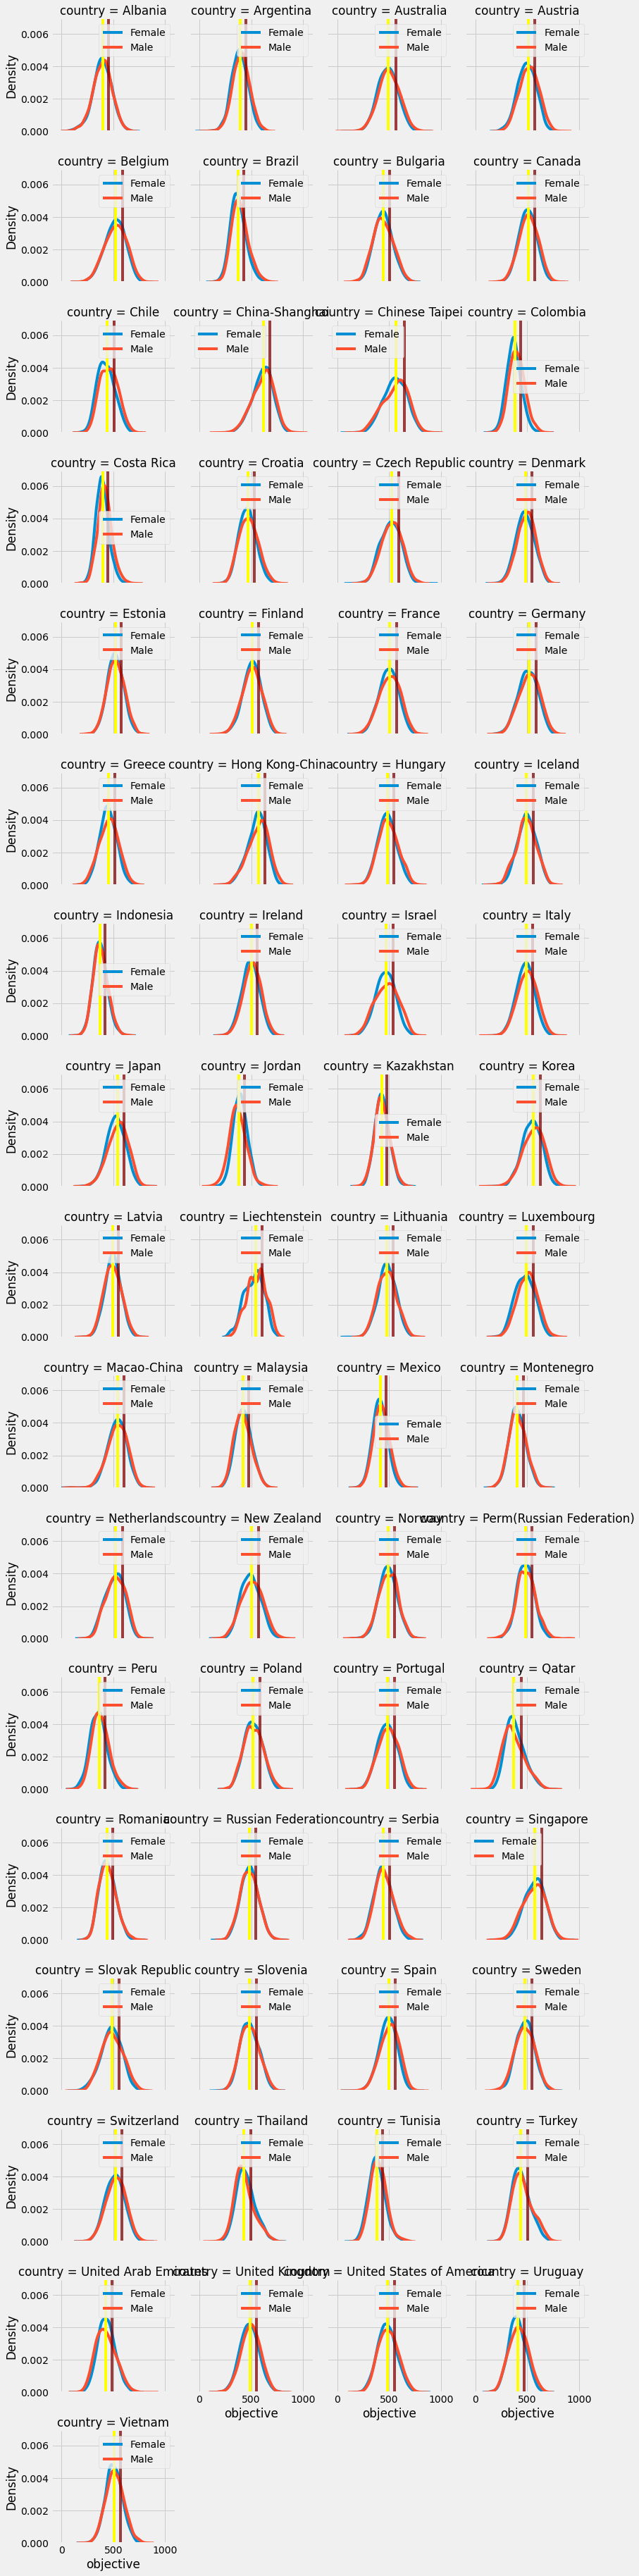

In [86]:
# Affichage du diagramme
g=sb.FacetGrid(data=pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'objective', bw=1/4)

for ax, title in zip(g.axes.flat, country):
    ax.axvline(x=pisa.query('country==@title').objective.quantile(.5), color='yellow')
    ax.axvline(x=pisa.query('country==@title').objective.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**Les élèves de sexe feminin ont un score d'objective plus élévé**

**APPREHENSION SCORE BY GENDER BY COUNTRY**

**Question 9 :**

* Existe t-il une proportionnalité selon des apprehensions selon le sexe en fonction du pays?

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

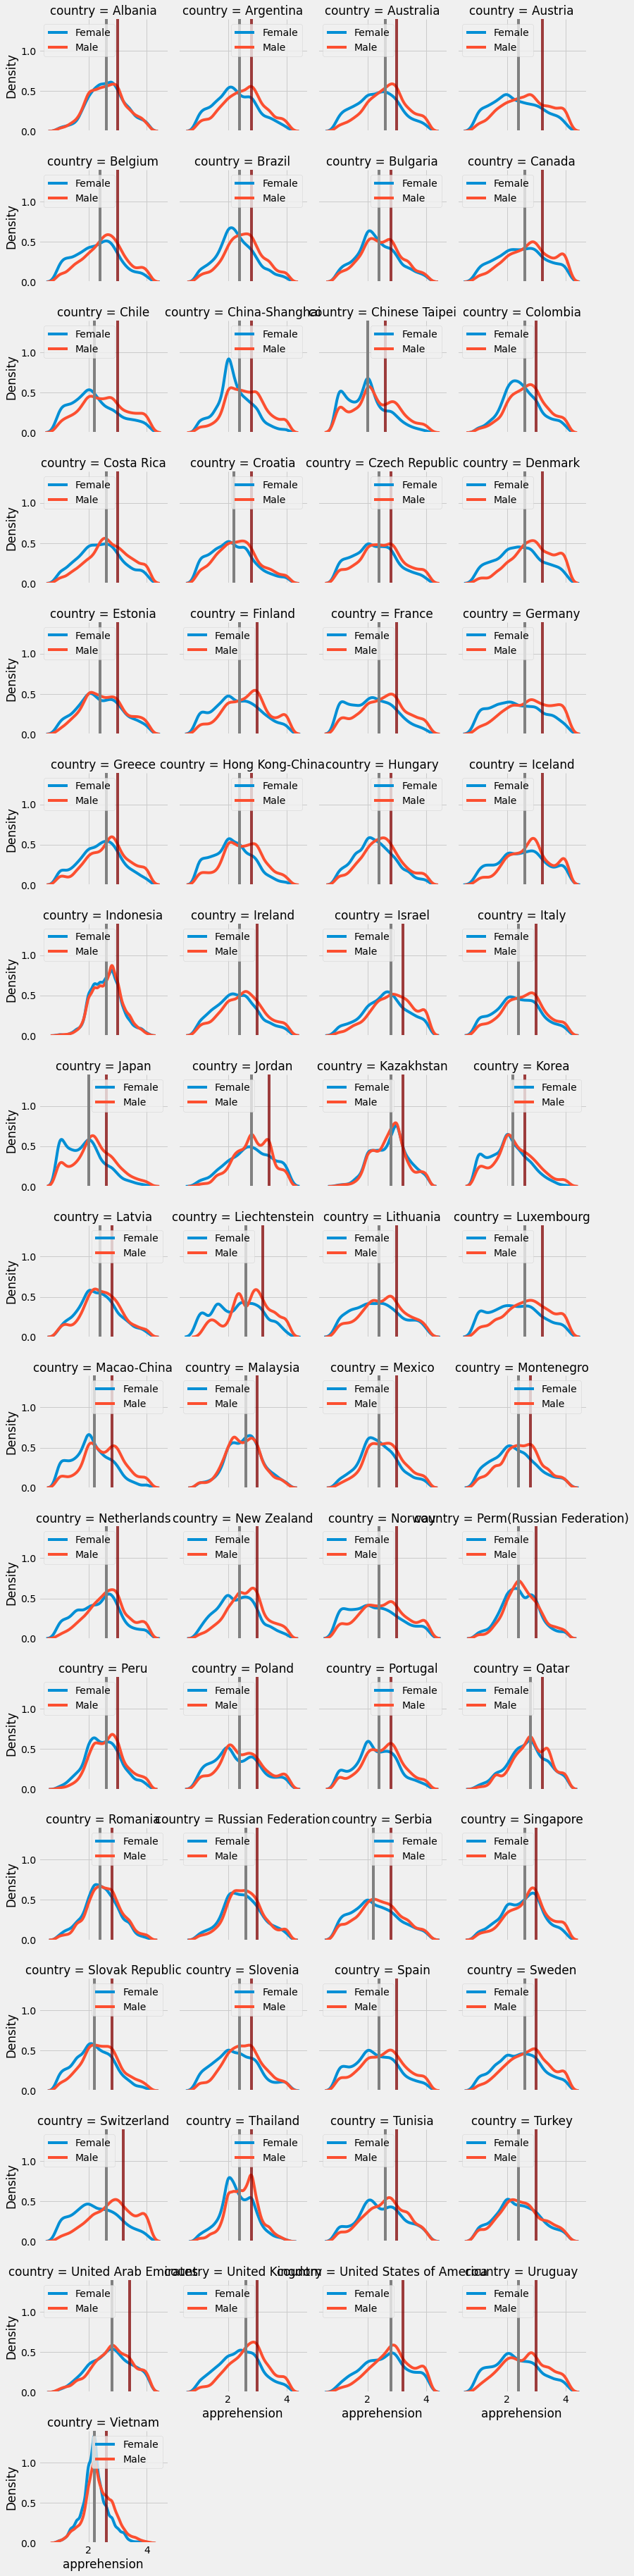

In [82]:
# Affichage du diagramme
g=sb.FacetGrid(data=pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'apprehension', bw=1/5)

for ax, title in zip(g.axes.flat, country):
    ax.axvline(x=pisa.query('country==@title').apprehension.quantile(.5), color='grey')
    ax.axvline(x=pisa.query('country==@title').apprehension.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**Les graphes nous montrent que la majeur partie des pays ont un score d'apprehension de femmes supérieur qu'à celui des hommes.**

**IMPORTANCE SCORE BY GENDER BY COUNTRY**

**Question 10 :**

* Existe t-il une proportionnalité selon de l'importance selon le sexe en fonction du pays?.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

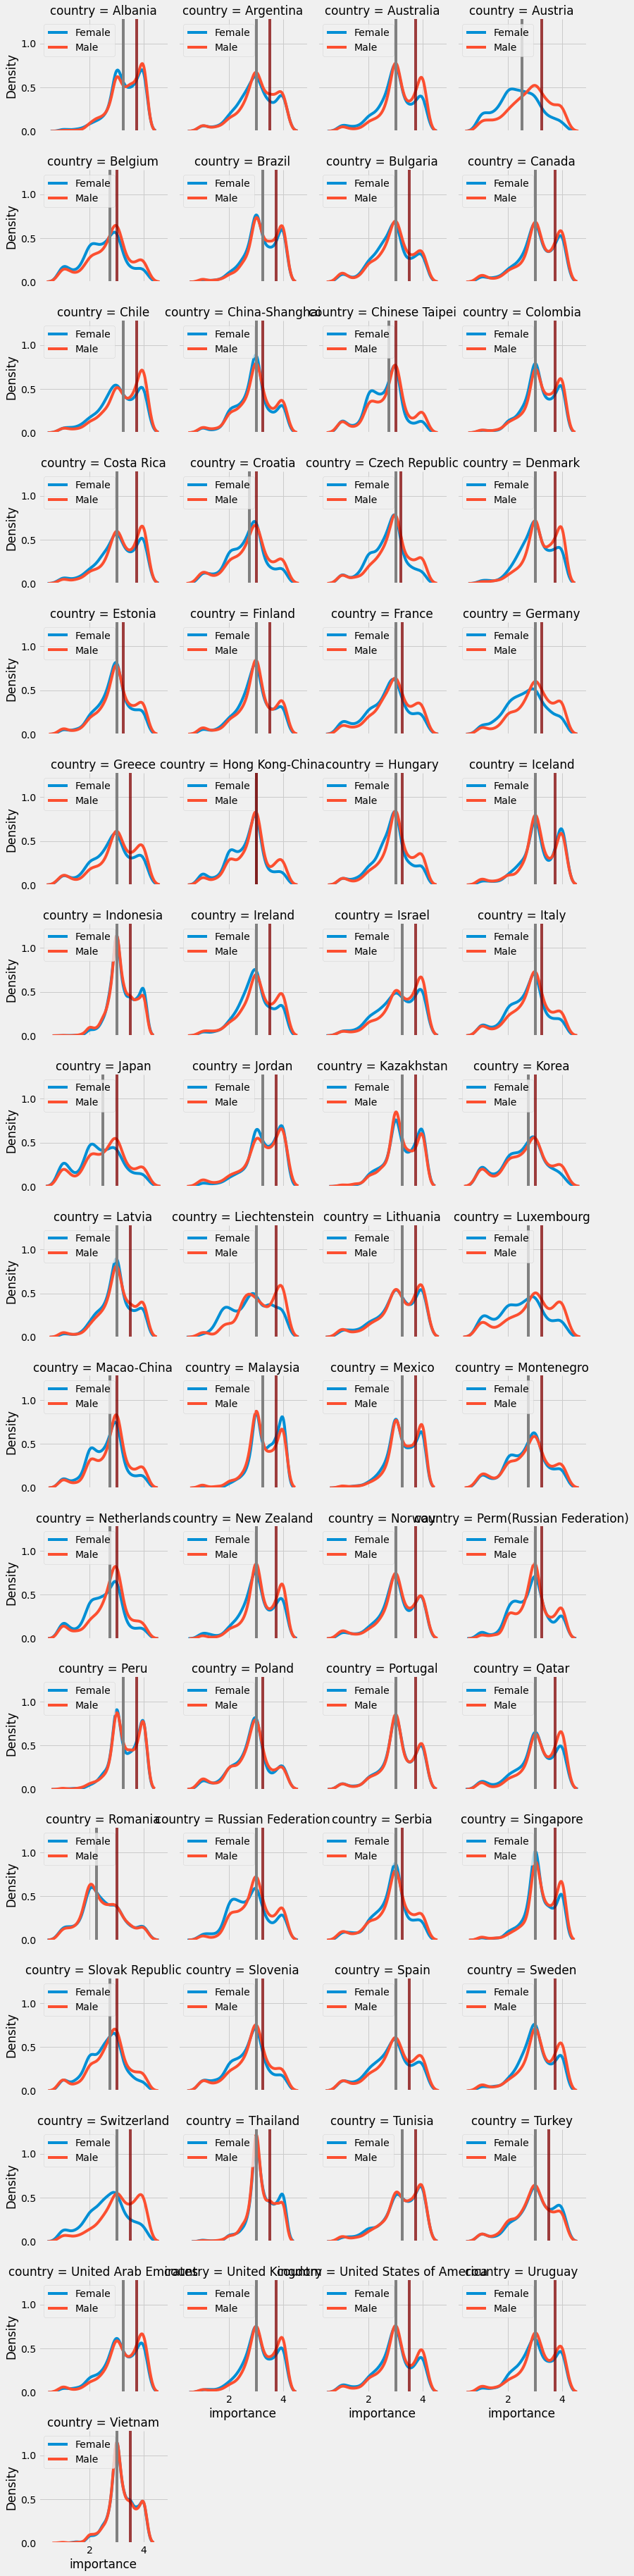

In [83]:
# Affichage du diagramme
g=sb.FacetGrid(data=pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'importance', bw=1/4)

for ax, title in zip(g.axes.flat, country):
    ax.axvline(x=pisa.query('country==@title').importance.quantile(.5), color='grey')
    ax.axvline(x=pisa.query('country==@title').importance.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**Nous constactons que le score d'importance est plus éléve chez les hommes que chez les femmes.**

**WORK_METHOD SCORE BY GENDER BY COUNTRY**

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depre

NameError: name 'country' is not defined

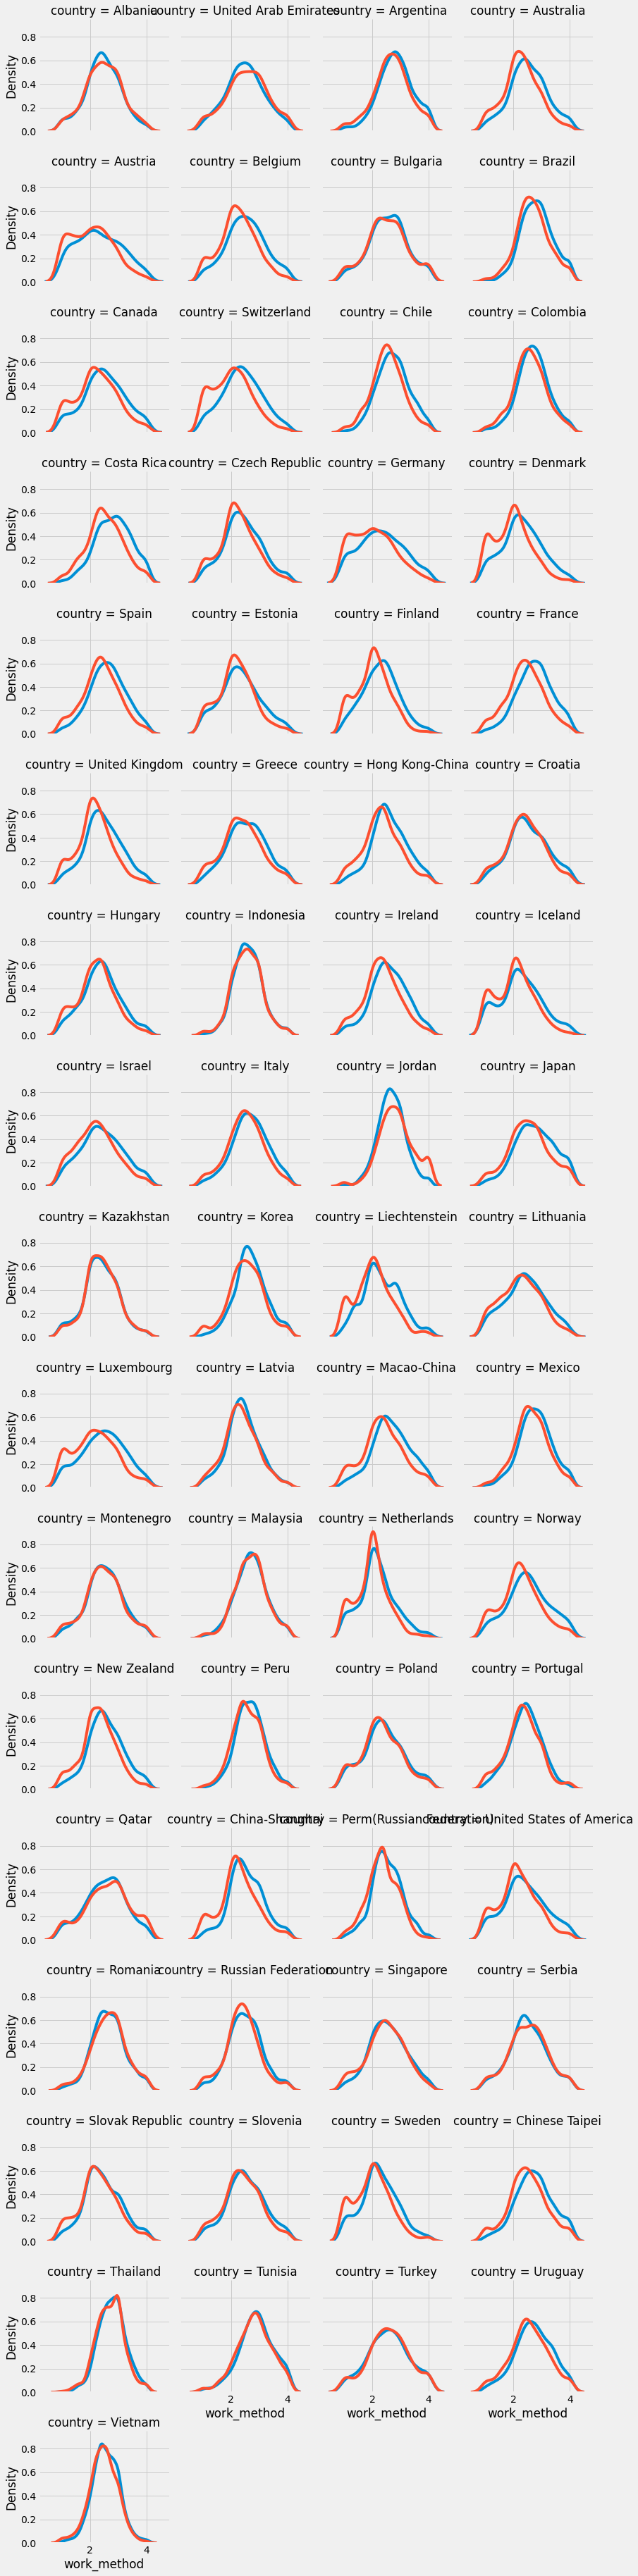

In [25]:
# Affichage du diagramme
g=sb.FacetGrid(data=pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'work_method', bw=1/4)

for ax, title in zip(g.axes.flat, country):
    ax.axvline(x=pisa.query('country==@title').work_method.quantile(.5), color='yellow')
    ax.axvline(x=pisa.query('country==@title').work_method.quantile(.75), color='maroon', alpha=.75)
    ax.legend()
    
plt.savefig('hist_work_method.png')


**Les graphes nous montrent une importance des femmes sur de la méthode éthique rapport aux hommes.**

**ATTITUDE SCORE BY GENDER BY COUNTRY**

**Question 11 :**

* Existe t-il une proportionnalité selon de l'attitude selon le sexe en fonction du pays?

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is de

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is de

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is de

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is de

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is de

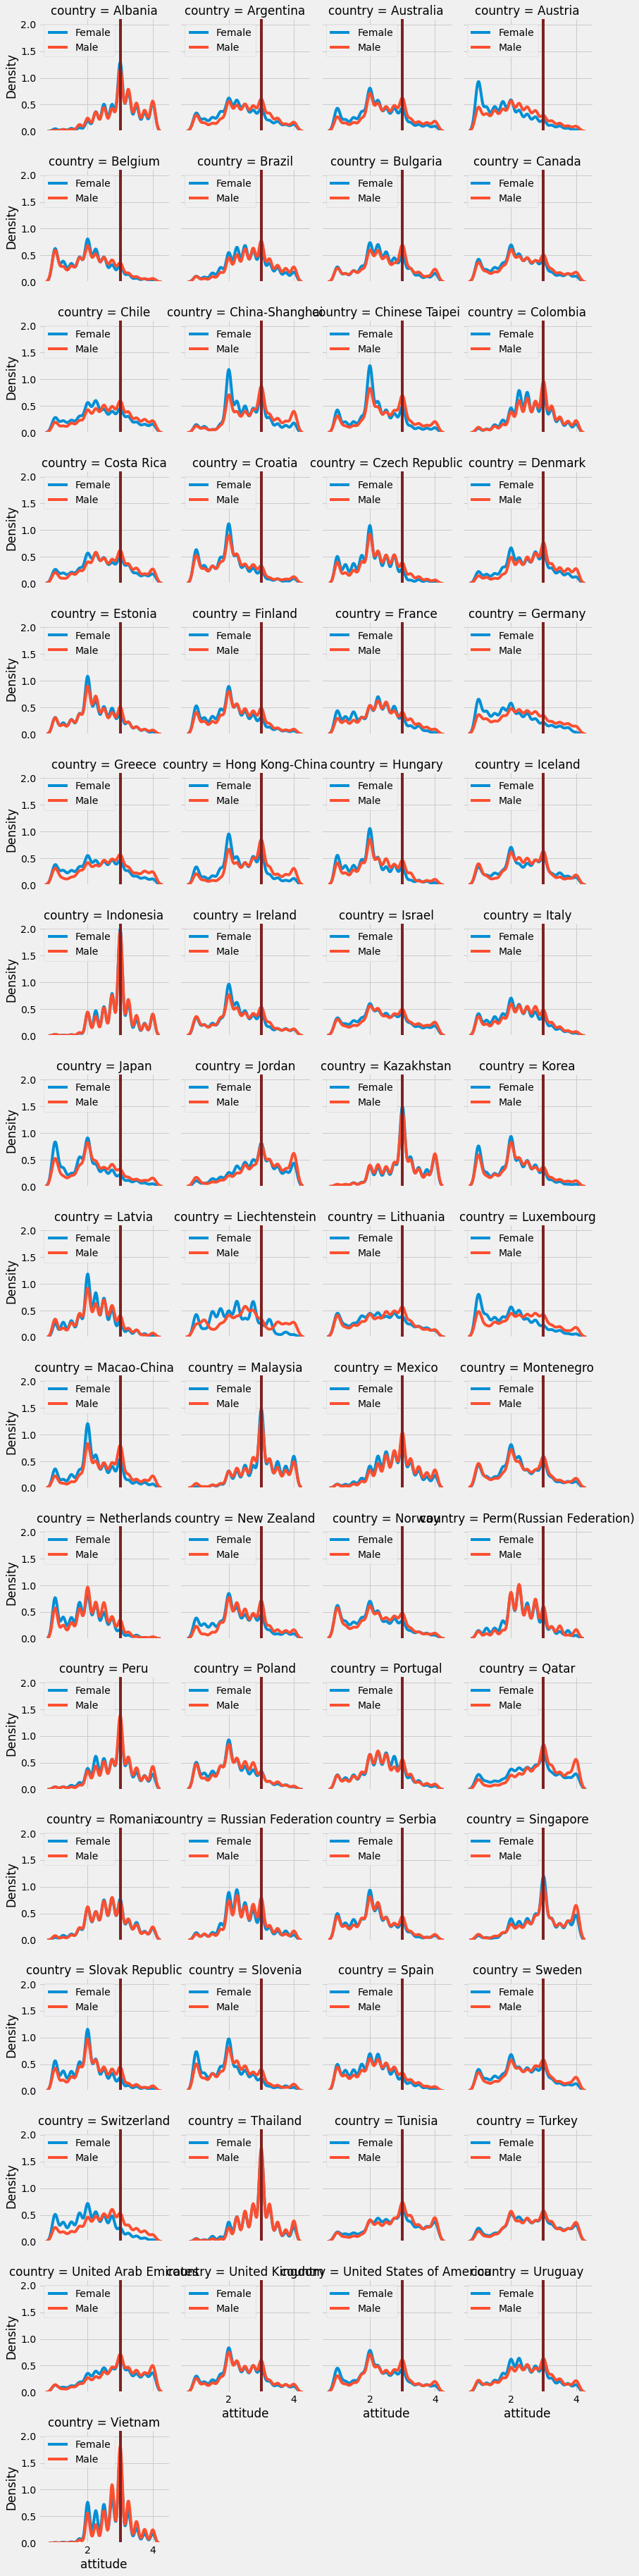

In [85]:
# Affichage du diagramme
g=sb.FacetGrid(data=pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'attitude', bw=.125)

for ax, c in zip(g.axes.flat, country):
    ax.axvline(x=pisa.query('country==@title').attitude.quantile(.5), color='grey')
    ax.axvline(x=pisa.query('country==@title').attitude.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**L'attitude des hommes est plus importante que celle des femmes.**

**SELF SCORE BY GENDER BY COUNTRY**

**Question 12 :**

* Existe t-il une proportionnalité selon du comportement de soi selon le sexe en fonction du pays?

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecat

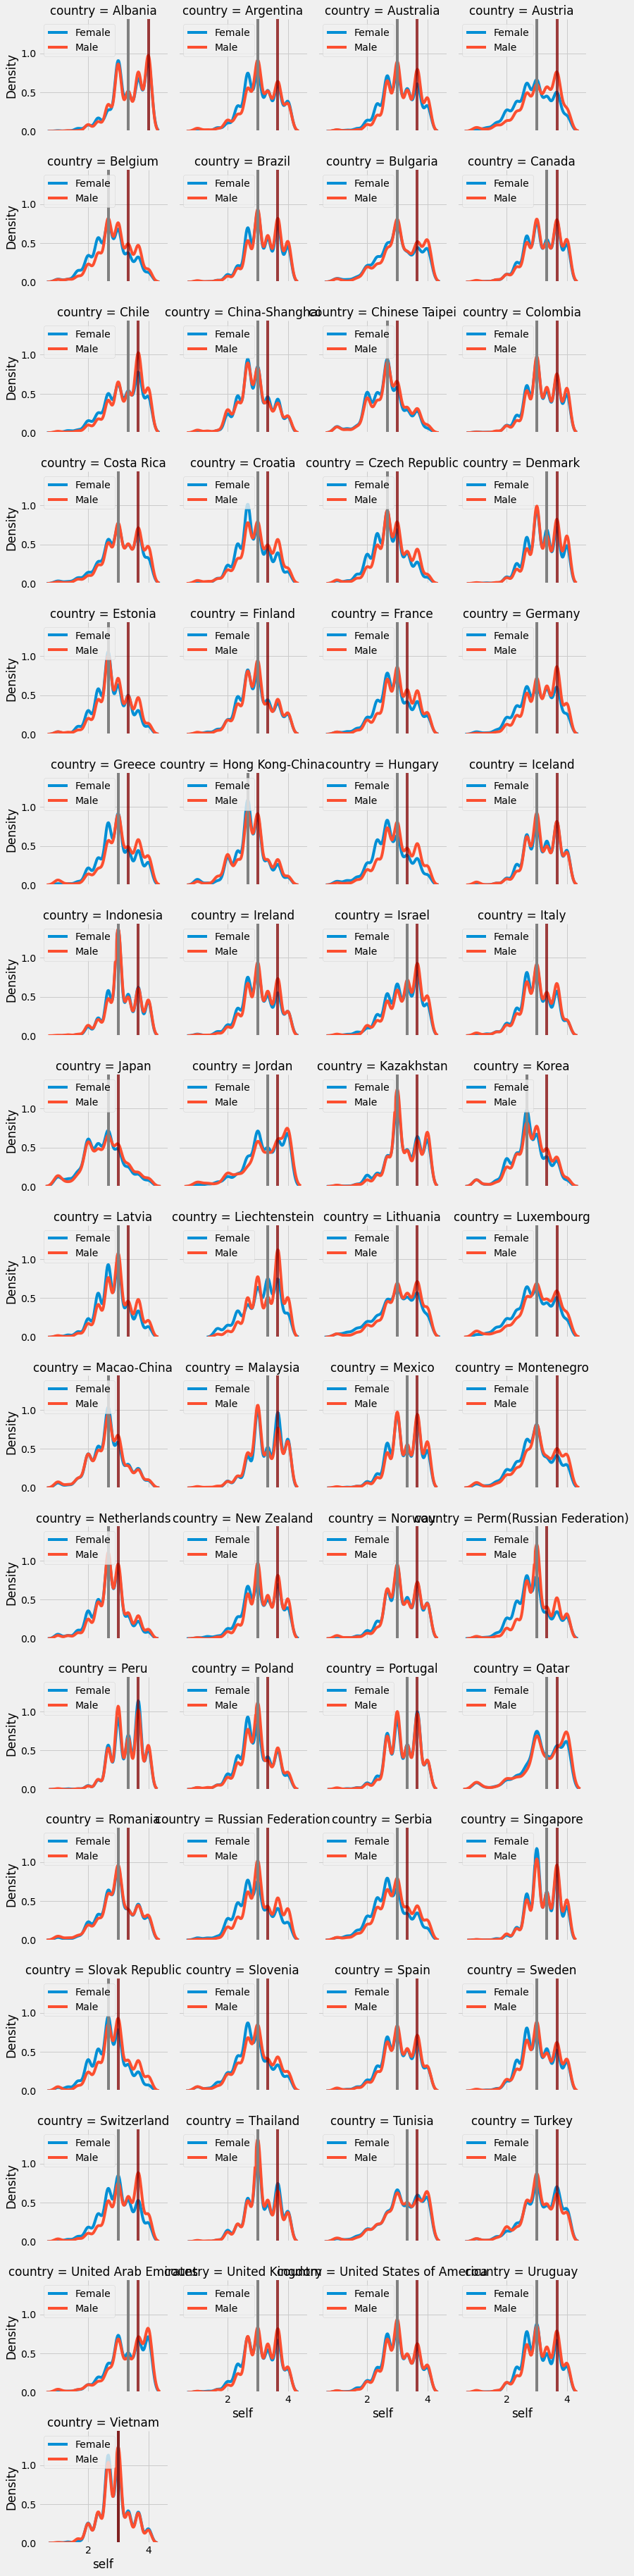

In [88]:
# Affichage du diagramme
g=sb.FacetGrid(data=pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'self', bw=1/5)

for ax, title in zip(g.axes.flat, country):
    ax.axvline(x=pisa.query('country==@title').self.quantile(.5), color='grey')
    ax.axvline(x=pisa.query('country==@title').self.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**Nous constactons une légère dommination de score de comportement de soi chez les hommes que chez les femmes.**

**PARENTAL_VIEW SCORE BY GENDER BY COUNTRY**

**Question 13 :**

* Existe t-il une proportionnalité selon du point de vue des parents selon le sexe en fonction du pays?

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3333333333333333 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: 

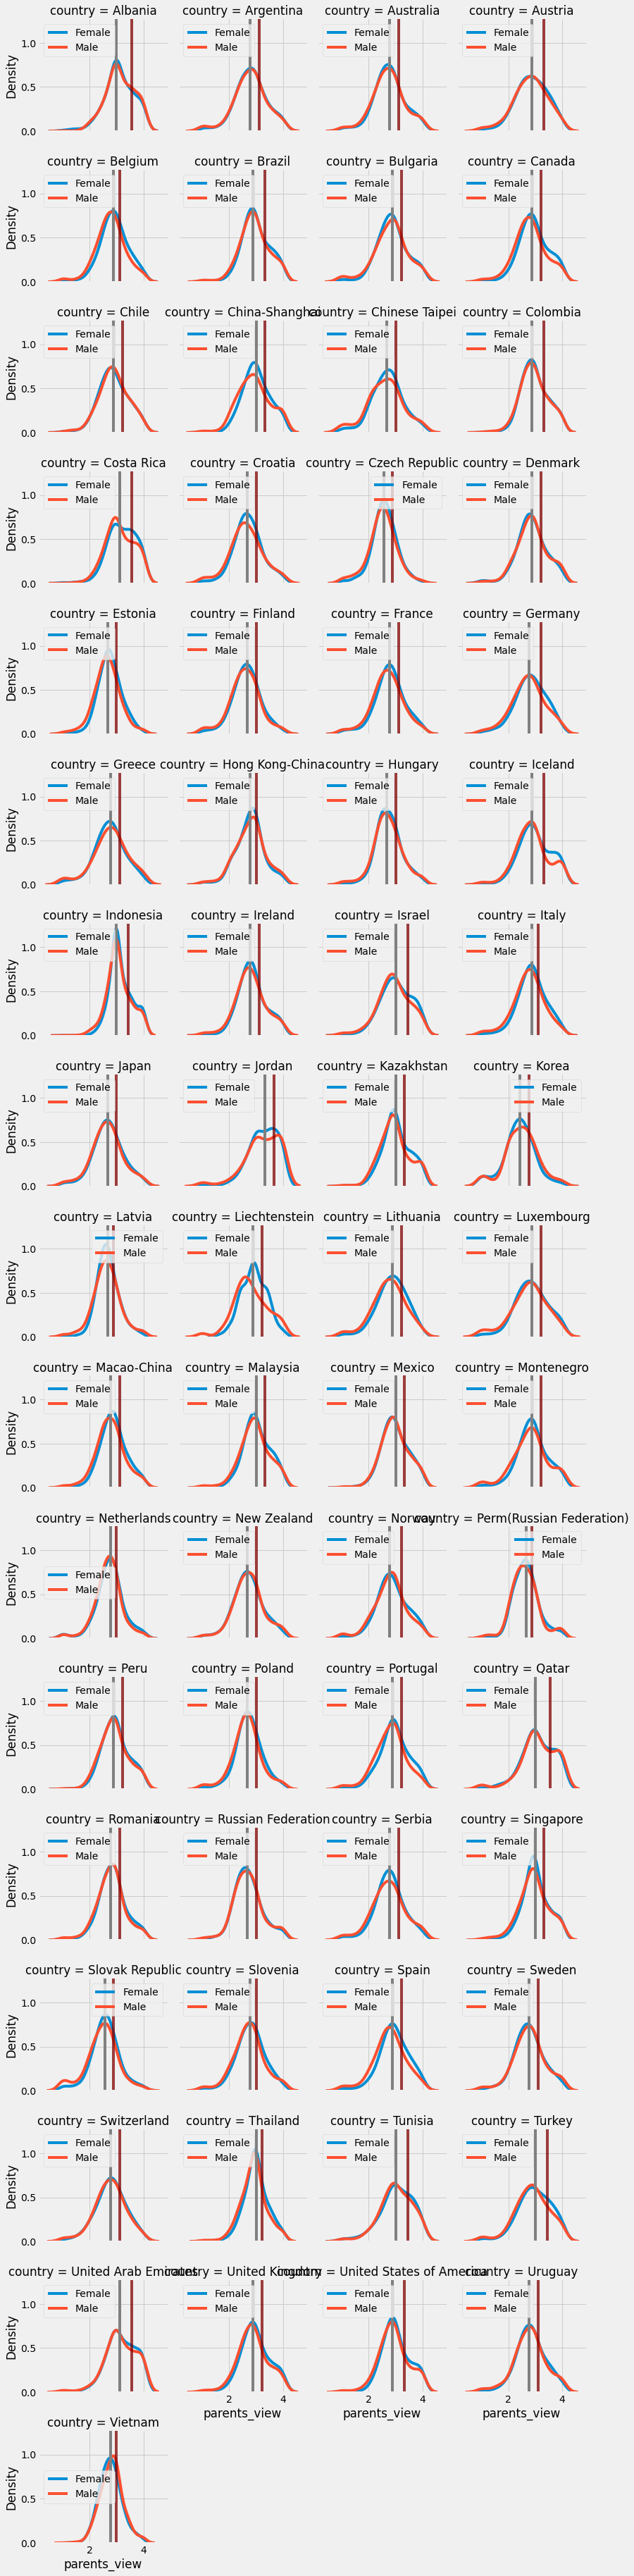

In [87]:
# Affichage du diagramme
g=sb.FacetGrid(data=pisa, col='country', hue='gender', col_wrap=4)
g.map(sb.kdeplot, 'parents_view', bw=1/3)

for ax, title in zip(g.axes.flat, country):
    ax.axvline(x=pisa.query('country==@title').parents_view.quantile(.5), color='grey')
    ax.axvline(x=pisa.query('country==@title').parents_view.quantile(.75), color='maroon', alpha=.75)
    ax.legend()

**Le score parental semble plus important chez les femmes que chez les hommes**